In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv('adult.csv')

***Data Exploration***







In [31]:
df.info()
#we have no missing/null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [33]:
df
#here educational-num is a catergorical variable corresponding to the education level

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [34]:
df.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [9]:
df.education.value_counts()

HS-grad         3121
Some-college    2125
Bachelors       1598
Masters          545
Assoc-voc        412
11th             358
Assoc-acdm       315
10th             273
7th-8th          186
Prof-school      146
9th              143
12th             121
Doctorate        106
5th-6th           98
1st-4th           48
Preschool         20
Name: education, dtype: int64

In [10]:
df.occupation.value_counts()

Prof-specialty       1222
Exec-managerial      1213
Craft-repair         1183
Adm-clerical         1079
Sales                1066
Other-service         960
Machine-op-inspct     621
?                     585
Transport-moving      429
Handlers-cleaners     414
Farming-fishing       310
Tech-support          279
Protective-serv       194
Priv-house-serv        57
Armed-Forces            3
Name: occupation, dtype: int64

In [11]:
#features workclass and occupation both have a feature named '?'. So we use prefixes while encoding these features to make sure that we use correct version of '?'

In [12]:
df.relationship.value_counts()

Husband           3800
Not-in-family     2521
Own-child         1512
Unmarried         1033
Wife               434
Other-relative     315
Name: relationship, dtype: int64

In [13]:
df.gender.value_counts()

Male      6409
Female    3205
Name: gender, dtype: int64

In [14]:
df.race.value_counts()

White                 8255
Black                  912
Asian-Pac-Islander     267
Amer-Indian-Eskimo      99
Other                   81
Name: race, dtype: int64

In [15]:
df.income.value_counts()

<=50K    7356
>50K     2258
Name: income, dtype: int64

***Encoding categorical variables***

  ONE HOT ENCODING using pandas for multi-value features (except education which has a heirarchical value)

In [35]:
#occupation
df= pd.concat([df.drop(columns ='occupation', axis =1), pd.get_dummies(df.occupation).add_prefix('occupation_')], axis =1)

In [36]:
#workclass
df = pd.concat([df.drop(columns ='workclass', axis =1), pd.get_dummies(df.workclass).add_prefix('workclass_')], axis =1)
#marital-status
df = pd.concat([df.drop(columns ='marital-status', axis =1), pd.get_dummies(df['marital-status']).add_prefix('marital-status_')], axis =1)
#relationship
df = pd.concat([df.drop(columns ='relationship', axis =1), pd.get_dummies(df.relationship).add_prefix('relationship_')], axis =1)
#race
df = pd.concat([df.drop(columns ='race', axis =1), pd.get_dummies(df.race).add_prefix('race_')], axis =1)
#native-country
df = pd.concat([df.drop(columns ='native-country', axis =1), pd.get_dummies(df['native-country']).add_prefix('native-country_')], axis =1)


In [37]:
df

,age,fnlwgt,education,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,11th,7,Male,0,0,40,<=50K,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,HS-grad,9,Male,0,0,50,<=50K,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,Assoc-acdm,12,Male,0,0,40,>50K,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,Some-college,10,Male,7688,0,40,>50K,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,Some-college,10,Female,0,0,30,<=50K,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,Assoc-acdm,12,Female,0,0,38,<=50K,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,HS-grad,9,Male,0,0,40,>50K,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,HS-grad,9,Female,0,0,40,<=50K,0,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,HS-grad,9,Male,0,0,20,<=50K,0,...,0,0,0,0,0,0,0,1,0,0


Encoding binary features (race and income) using lambda

In [38]:
#gender
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df

,age,fnlwgt,education,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,11th,7,1,0,0,40,<=50K,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,HS-grad,9,1,0,0,50,<=50K,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,Assoc-acdm,12,1,0,0,40,>50K,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,Some-college,10,1,7688,0,40,>50K,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,Some-college,10,0,0,0,30,<=50K,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,Assoc-acdm,12,0,0,0,38,<=50K,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,HS-grad,9,1,0,0,40,>50K,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,HS-grad,9,0,0,0,40,<=50K,0,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,HS-grad,9,1,0,0,20,<=50K,0,...,0,0,0,0,0,0,0,1,0,0


In [39]:
df['income'] = df['income'].apply(lambda x: 1 if x == '<=50K' else 0)

***CHECKING CORRELATIONS BETWEEN VARIOUS FEATURES***

<ipython-input-40-4f442bd6ecd4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot= False, cmap = 'coolwarm')


<Axes: >

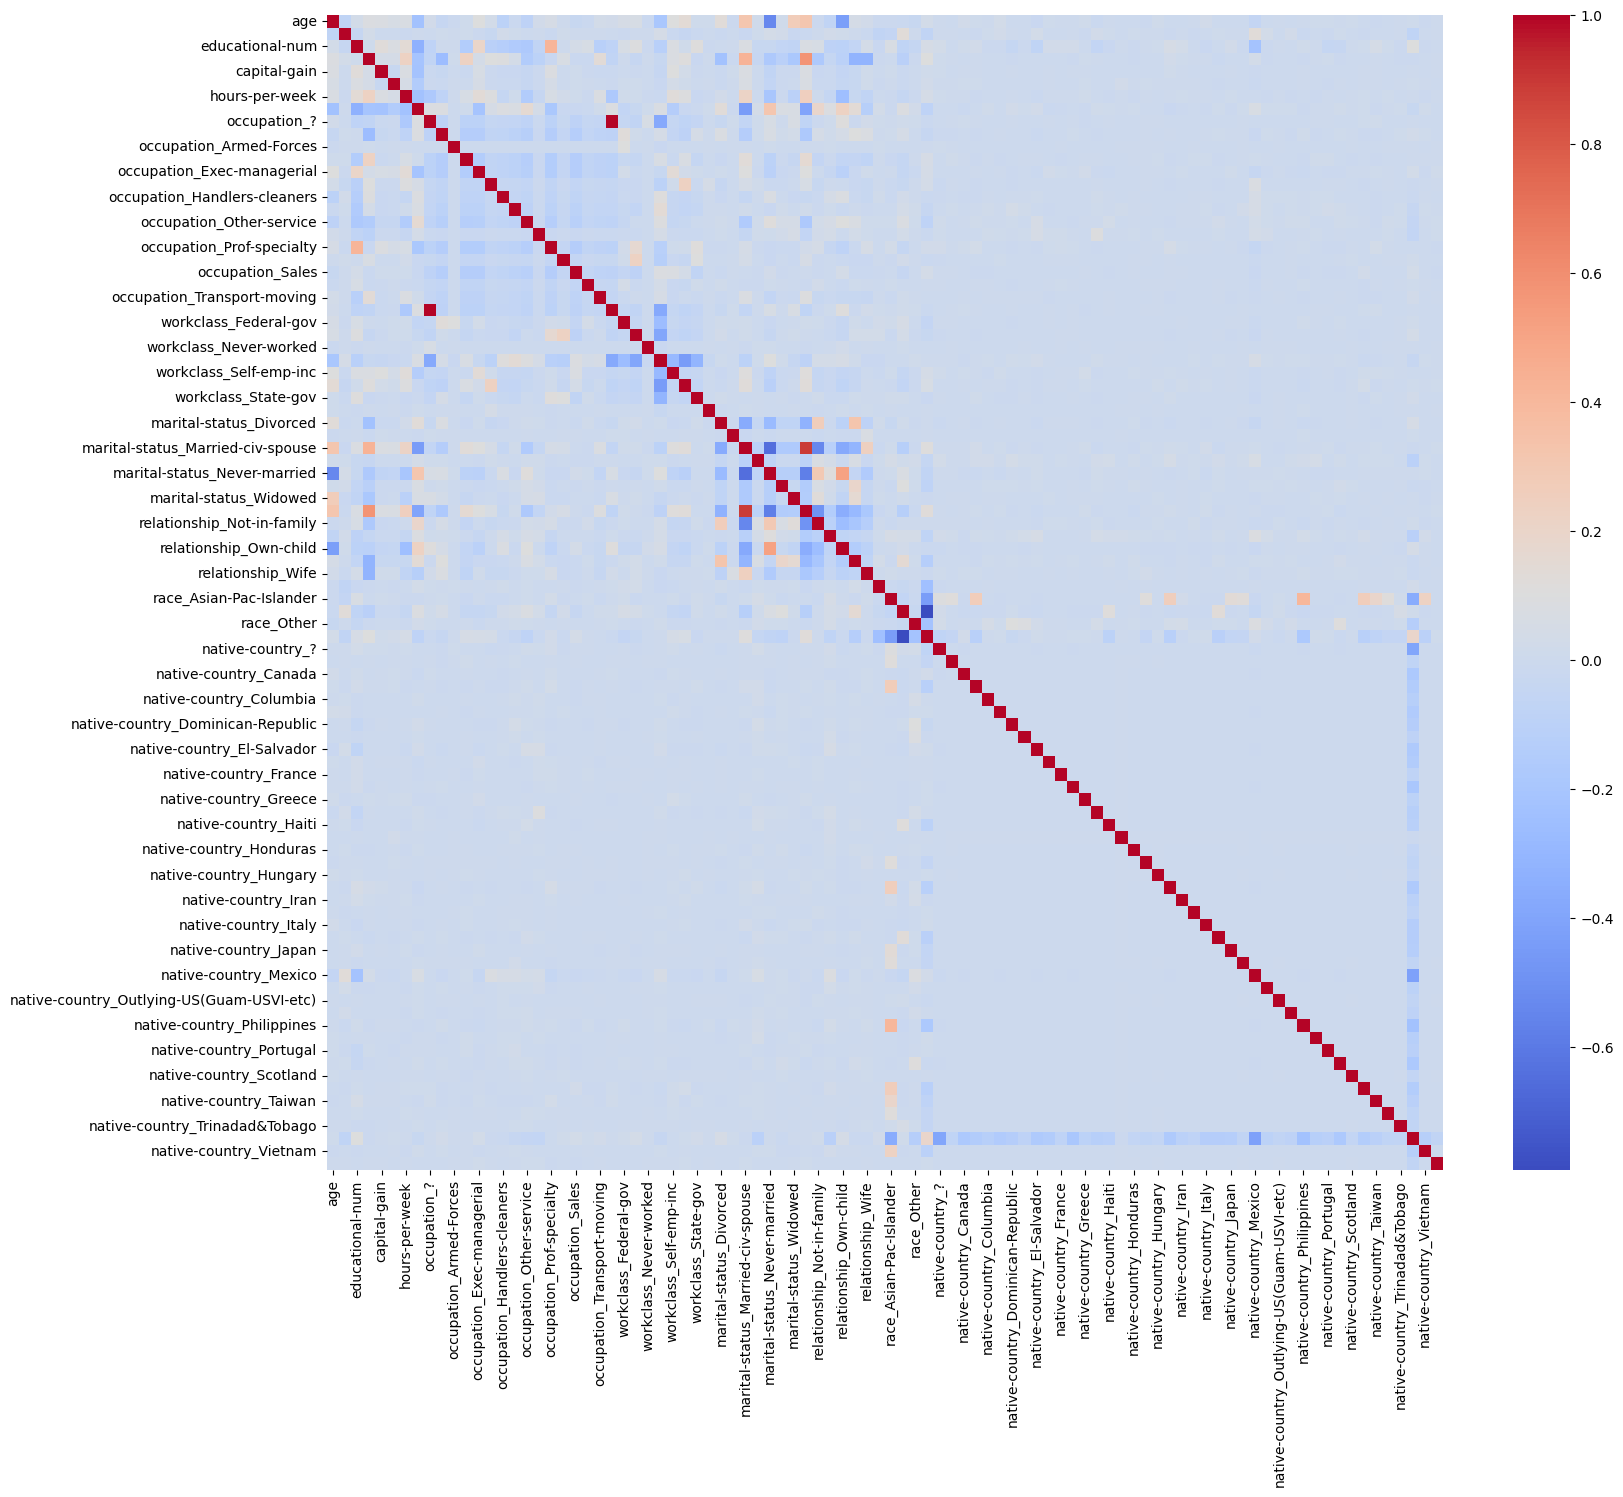

In [40]:
plt.figure(figsize = (18,15))
sns.heatmap(df.corr(), annot= False, cmap = 'coolwarm')
#shows too many features. Need to filter features to visualize some sort of correlations

***Filtering the featues for correlation***

In [41]:
#selecting only income correlations. we take abs values of correlation, sort them in order and then select features for correlations
#this selection is only for correlations visualization. Model will be trained on all features
correlations = df.corr()['income'].abs()
sorted_correlations = correlations.sort_values()
num_cols_to_drop = int(0.8 * len(df.columns))  # selecting only 80% of columns with highest corr
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index
df_dropped = df.drop(cols_to_drop, axis =1)

<ipython-input-41-b58b86e3e04d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()['income'].abs()


<ipython-input-42-42957b4ccafe>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_dropped.corr(), annot= True, cmap = 'coolwarm')


<Axes: >

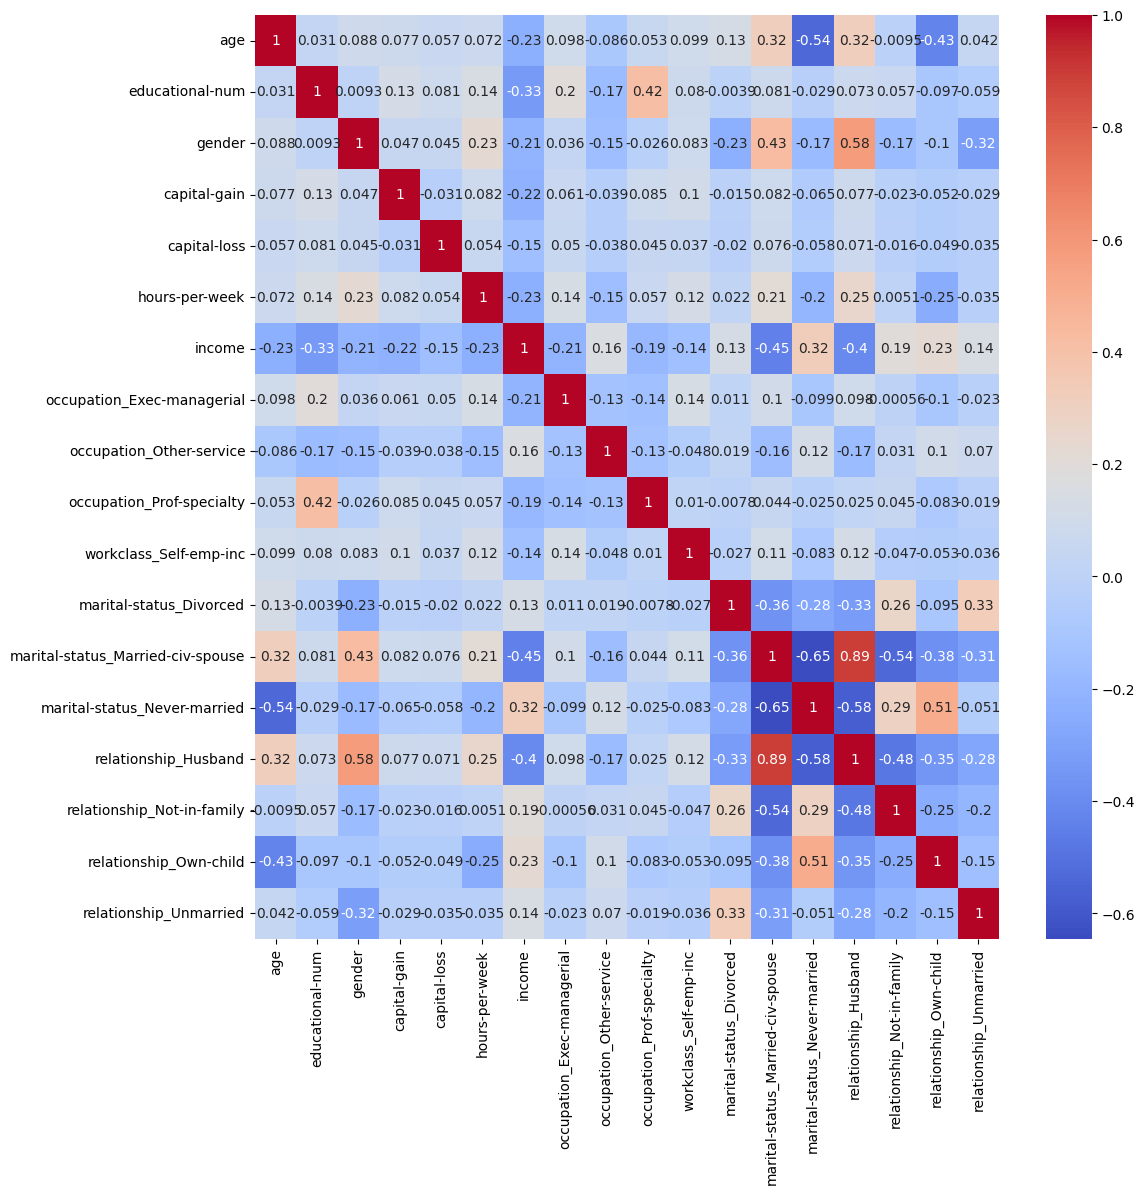

In [42]:
plt.figure(figsize = (12,12))
sns.heatmap(df_dropped.corr(), annot= True, cmap = 'coolwarm')

***ENCODING education WITH ORDINAL ENCODER***

In [44]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
df['educational-num'] = enc.fit_transform(df[['educational-num']])

In [45]:
df

,age,fnlwgt,education,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,11th,6.0,1,0,0,40,1,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,HS-grad,8.0,1,0,0,50,1,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,Assoc-acdm,11.0,1,0,0,40,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,Some-college,9.0,1,7688,0,40,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,Some-college,9.0,0,0,0,30,1,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,Assoc-acdm,11.0,0,0,0,38,1,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,HS-grad,8.0,1,0,0,40,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,HS-grad,8.0,0,0,0,40,1,0,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,HS-grad,8.0,1,0,0,20,1,0,...,0,0,0,0,0,0,0,1,0,0


In [46]:
#dropping education column as it has become redundant
df = df.drop('education', axis=1)

In [47]:
#fnlwgt = final weight, which is the number of units in the target population that the responding unit represents. This is not a feature so we drop it.
df = df.drop('fnlwgt', axis=1)

In [48]:
df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,6.0,1,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,8.0,1,0,0,50,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,11.0,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,9.0,1,7688,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,9.0,0,0,0,30,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,11.0,0,0,0,38,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,8.0,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,8.0,0,0,0,40,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48840,22,8.0,1,0,0,20,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0


***Splitting dataset into test and train sets***

In [49]:
x = df.drop('income', axis=1)
y= df['income']

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size = 0.2)


***Training the model***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10)

In [ ]:
rfc.score(x_test,y_test)

0.8423584809089979

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = rfc.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[1508  831]
 [ 709 6721]]
0.8423584809089979


In [ ]:
#checking the importance of vcarious features. we need to populate them in a dictionary and arrange in descending order
importances = dict(zip(rfc.feature_names_in_, rfc.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key =lambda x: x[1], reverse= True)}

In [ ]:
importances
#however, RFC picks the features randomly, so importance may change on retraining the model. but generally the top features remain the top changing order among themselves

{'age': 0.23376532969894326,
 'educational-num': 0.14179633583208304,
 'marital-status_Married-civ-spouse': 0.11223253845487674,
 'hours-per-week': 0.10973358033610092,
 'capital-gain': 0.09812630292580328,
 'capital-loss': 0.03629539715263122,
 'occupation_Exec-managerial': 0.02394953374936036,
 'relationship_Husband': 0.02199105959581997,
 'marital-status_Never-married': 0.017292240016567553,
 'occupation_Prof-specialty': 0.01671709677705801,
 'relationship_Not-in-family': 0.013199116154848648,
 'gender': 0.010443024701532617,
 'relationship_Unmarried': 0.009296342815355374,
 'workclass_Private': 0.009055085683168755,
 'workclass_Self-emp-not-inc': 0.007750252965940646,
 'occupation_Other-service': 0.0070251211295009955,
 'occupation_Sales': 0.00640760100449045,
 'workclass_Self-emp-inc': 0.006306388739736209,
 'relationship_Wife': 0.006290416505818049,
 'race_White': 0.0061828289192643405,
 'native-country_United-States': 0.00594174035171237,
 'occupation_Craft-repair': 0.0057726257